## Set Up

### Import & define & read from src

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

def get_raw_table(src_path: str, dst_path, column_labels: list, filter_dict: dict = None):
    '''
    Trích các cột cần trong dim job và đưa ra 1 file csv mới là tham số truyền vô
    Thêm jobid va`o
    Lấy các cột trong column_labels
    Lọc theo dict với mỗi key là array of not accepted value
    '''
    df = pd.read_csv(src_path, encoding='ISO-8859-1')

    for col, not_value in filter_dict.items():
        df = df[~df[col].isin(not_value)]

    df = df[column_labels]
    df.reset_index(drop=True, inplace=True)

    df.rename({
        'PERSONID': 'person_id',
        'PRDTIND1': 'detail_industry',
        'PRDTOCC1': 'detail_occupation',
        'PRTAGE': 'age',
        'PEMARITL': 'marital_status',
        'PESEX': 'sex',
        'PEEDUCA': 'education_level',
        'PTDTRACE': 'race',
        'PRFTLF': 'ft/pt',
        'GESTFIPS': 'state',
        'GTCBSA': 'metropolitan',
        'PEHRUSL1': 'hours_a_week',
        'PUHROT1': 'last_week_OT', #1 yes, 2 no
        'PUHROT2': 'additional_hours_OT',
        'PEERNHRO': 'usual_hours',
        'PRERNHLY': 'hourly_rate',
        'PRERNWA': 'weekly_rate',
        'PEDISEAR': 'deaf_diff_hearing',
        'PEDISEYE': 'blind_diff_seeing_glass',
        'PEDISREM': 'diff_concerntrating_remembering_decision',
        'PEDISPHY': 'diff_climbing_walking',
        'PEDISDRS': 'diff_dressing_bathing',
        'PRDISFLG': 'disability_issue', #1 yes, 2 no
    },
    axis=1, inplace=True)
    
    #print(df.head())
    df.to_csv(dst_path, index=False)

In [32]:
columns_to_get = ['PERSONID', 'PRDTIND1', 'PRDTOCC1', 'PRTAGE', 'PEMARITL', 'PESEX', 'PEEDUCA', 'PTDTRACE', 'PRFTLF', 'GTCBSA',
                   'PEHRUSL1', 'PEDISEAR', 'PEDISEYE', 'PEDISREM', 'PEDISPHY', 'PEDISDRS', 'PRDISFLG']
dict_to_filter = {
    #Only employed
    'PREMPNOT': [-1,2,3,4],
    #Only have 1 job
	'PEMJOT': [-1,1], 
    #Only if they know which city they 're in => which metropolitan is not 0
    'GTINDVPC': [0],
    #'PRDISFLG': [2]
}

get_raw_table('./src/filtered_cps.csv', './temp/employment.csv', column_labels= columns_to_get, filter_dict=dict_to_filter)
test = pd.read_csv('./temp/employment.csv')
print(test.head())

   person_id  detail_industry  detail_occupation  age  marital_status  sex  \
0       4964               42                 10   51               1    1   
1       4965               41                 10   66               6    2   
2       4966               51                  1   47               4    1   
3       4971               45                 15   48               4    2   
4       4972               38                  1   31               6    1   

   education_level  race  ft/pt  metropolitan  hours_a_week  \
0               44     1      1         38060            50   
1               44     1      1         38060            40   
2               44     1      1         38060            45   
3               43     1      1         38060            40   
4               40     1      1         38060            48   

   deaf_diff_hearing  blind_diff_seeing_glass  \
0                  2                        2   
1                  2                        2   
2    

### Convert Foreign key to Value 

In [33]:
detail_industry_df = pd.read_csv('./src/detail_industry.csv')
detail_occupation_df = pd.read_csv('./src/detail_occupation.csv')
marital_status_df = pd.read_csv('./src/marital_status.csv')
education_df = pd.read_csv('./src/education.csv')
race_df = pd.read_csv('./src/race.csv')
metropolitan_df = pd.read_csv('./src/metropolitan.csv')

raw_df = pd.read_csv('./temp/employment.csv')
raw_df = pd.merge(raw_df, detail_industry_df, left_on='detail_industry', right_on='detail_industry_id')
raw_df = pd.merge(raw_df, detail_occupation_df, left_on='detail_occupation', right_on='detail_occupation_id')
raw_df = pd.merge(raw_df, marital_status_df, left_on='marital_status', right_on='marital_status_id')
raw_df = pd.merge(raw_df, education_df, left_on='education_level', right_on='education_id')
raw_df = pd.merge(raw_df, race_df, left_on='race', right_on='race_id')
raw_df = pd.merge(raw_df, metropolitan_df, left_on='metropolitan', right_on='metropolitan_id')

raw_df.drop(['detail_industry','detail_occupation', 'marital_status','education_level', 'race', 'metropolitan',
             'detail_industry_id', 'detail_occupation_id', 'marital_status_id', 'education_id', 'race_id', 'metropolitan_id', 'foreign_state_id'],
            axis=1, inplace=True)
raw_df.rename(mapper={
    'detail_industry_value': 'industry',
    'detail_occupation_value': 'occupation',
    'marital_status_value': 'marital_status',
    'education_value': 'education',
    'race_value': 'race',
    'metropolitan_value': 'metropolitan',
}, axis=1, inplace=True)

print(raw_df.head())


   person_id  age  sex  ft/pt  hours_a_week  deaf_diff_hearing  \
0       4964   51    1      1            50                  2   
1       5069   39    2      1            40                  2   
2       5068   40    1      1            40                  2   
3       5199   56    2      1            40                  2   
4       5712   46    1      1            60                  2   

   blind_diff_seeing_glass  diff_concerntrating_remembering_decision  \
0                        2                                         2   
1                        2                                         2   
2                        2                                         2   
3                        2                                         2   
4                        2                                         2   

   diff_climbing_walking  diff_dressing_bathing  disability_issue  \
0                      2                      2                 2   
1                      2        

### Discover the data for insights

### Explore cols 's values and count , examples


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7873 entries, 0 to 7872
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   person_id                                 7873 non-null   int64 
 1   age                                       7873 non-null   int64 
 2   sex                                       7873 non-null   int64 
 3   ft/pt                                     7873 non-null   int64 
 4   hours_a_week                              7873 non-null   int64 
 5   deaf_diff_hearing                         7873 non-null   int64 
 6   blind_diff_seeing_glass                   7873 non-null   int64 
 7   diff_concerntrating_remembering_decision  7873 non-null   int64 
 8   diff_climbing_walking                     7873 non-null   int64 
 9   diff_dressing_bathing                     7873 non-null   int64 
 10  disabili

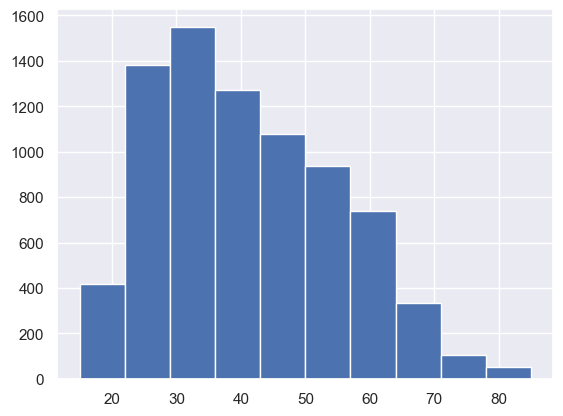

In [34]:
print('\n____________ Dataset info ____________')
print(raw_df.info())
print('\n____________ Some Data Examples ____________')
#print(raw_df.head(2))
print('\n____________ Features Values and count ____________')

#region Print all values and count of each feature
print(raw_df['age'].value_counts(),'\n')
print(raw_df['hours_a_week'].value_counts(),'\n') #-4 have 443 values => have to fillby a value
print(raw_df['industry'].value_counts(),'\n')
print(raw_df['occupation'].value_counts(),'\n')
print(raw_df['marital_status'].value_counts(),'\n')
print(raw_df['education'].value_counts(),'\n')
print(raw_df['race'].value_counts(),'\n')
print(raw_df['metropolitan'].value_counts(),'\n')
#endregion

raw_df['age'].hist()
print("Num:",len(raw_df[raw_df['hours_a_week'] == 0])) #5 giá trị 0
#raw_df['hours_a_week'].hist()


### Plotting hist for more insights

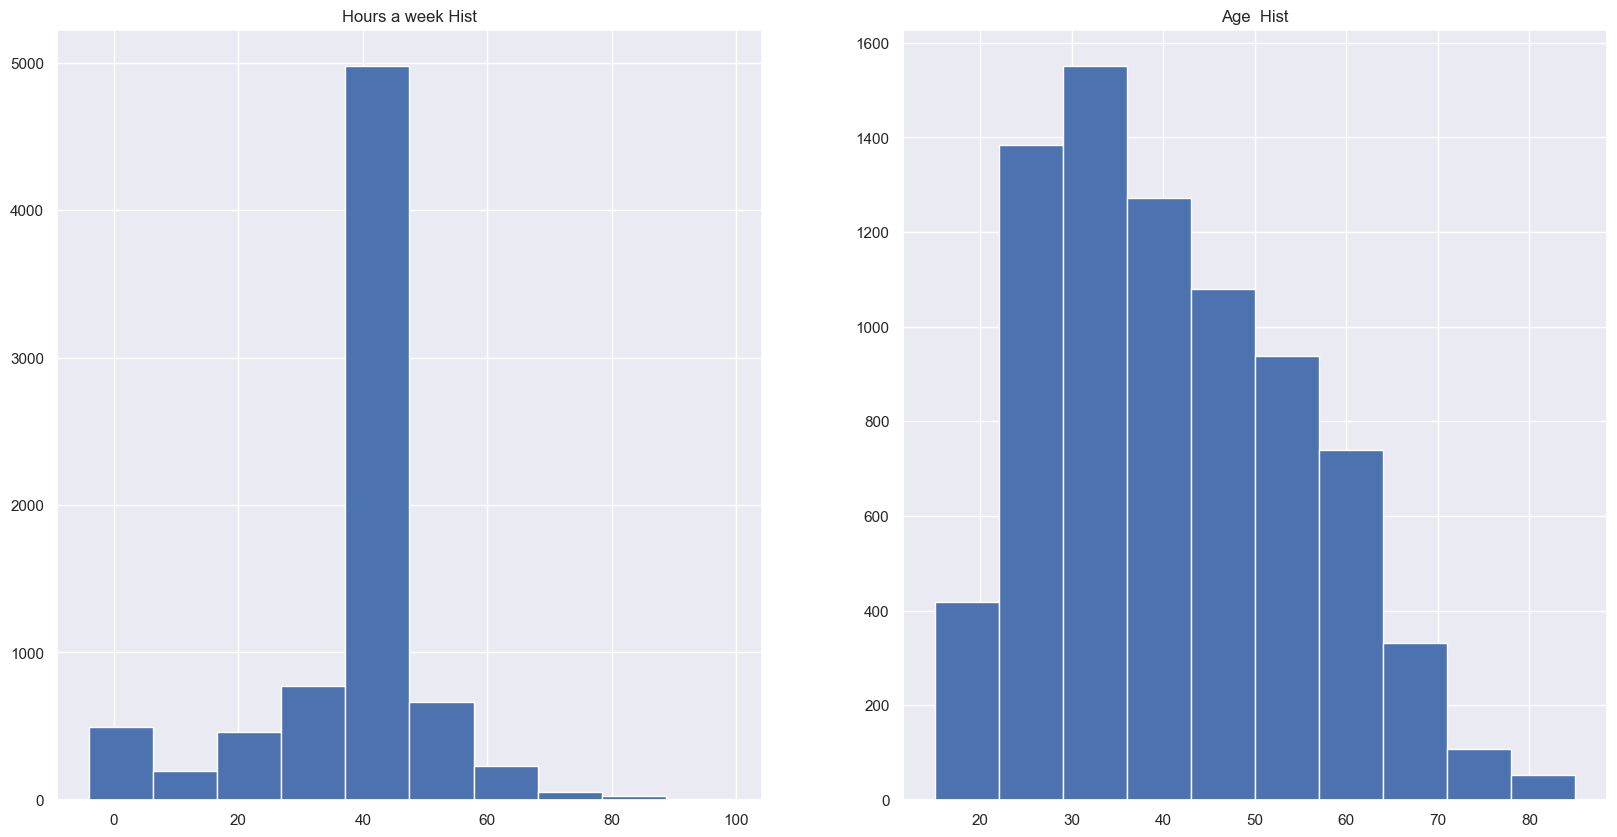

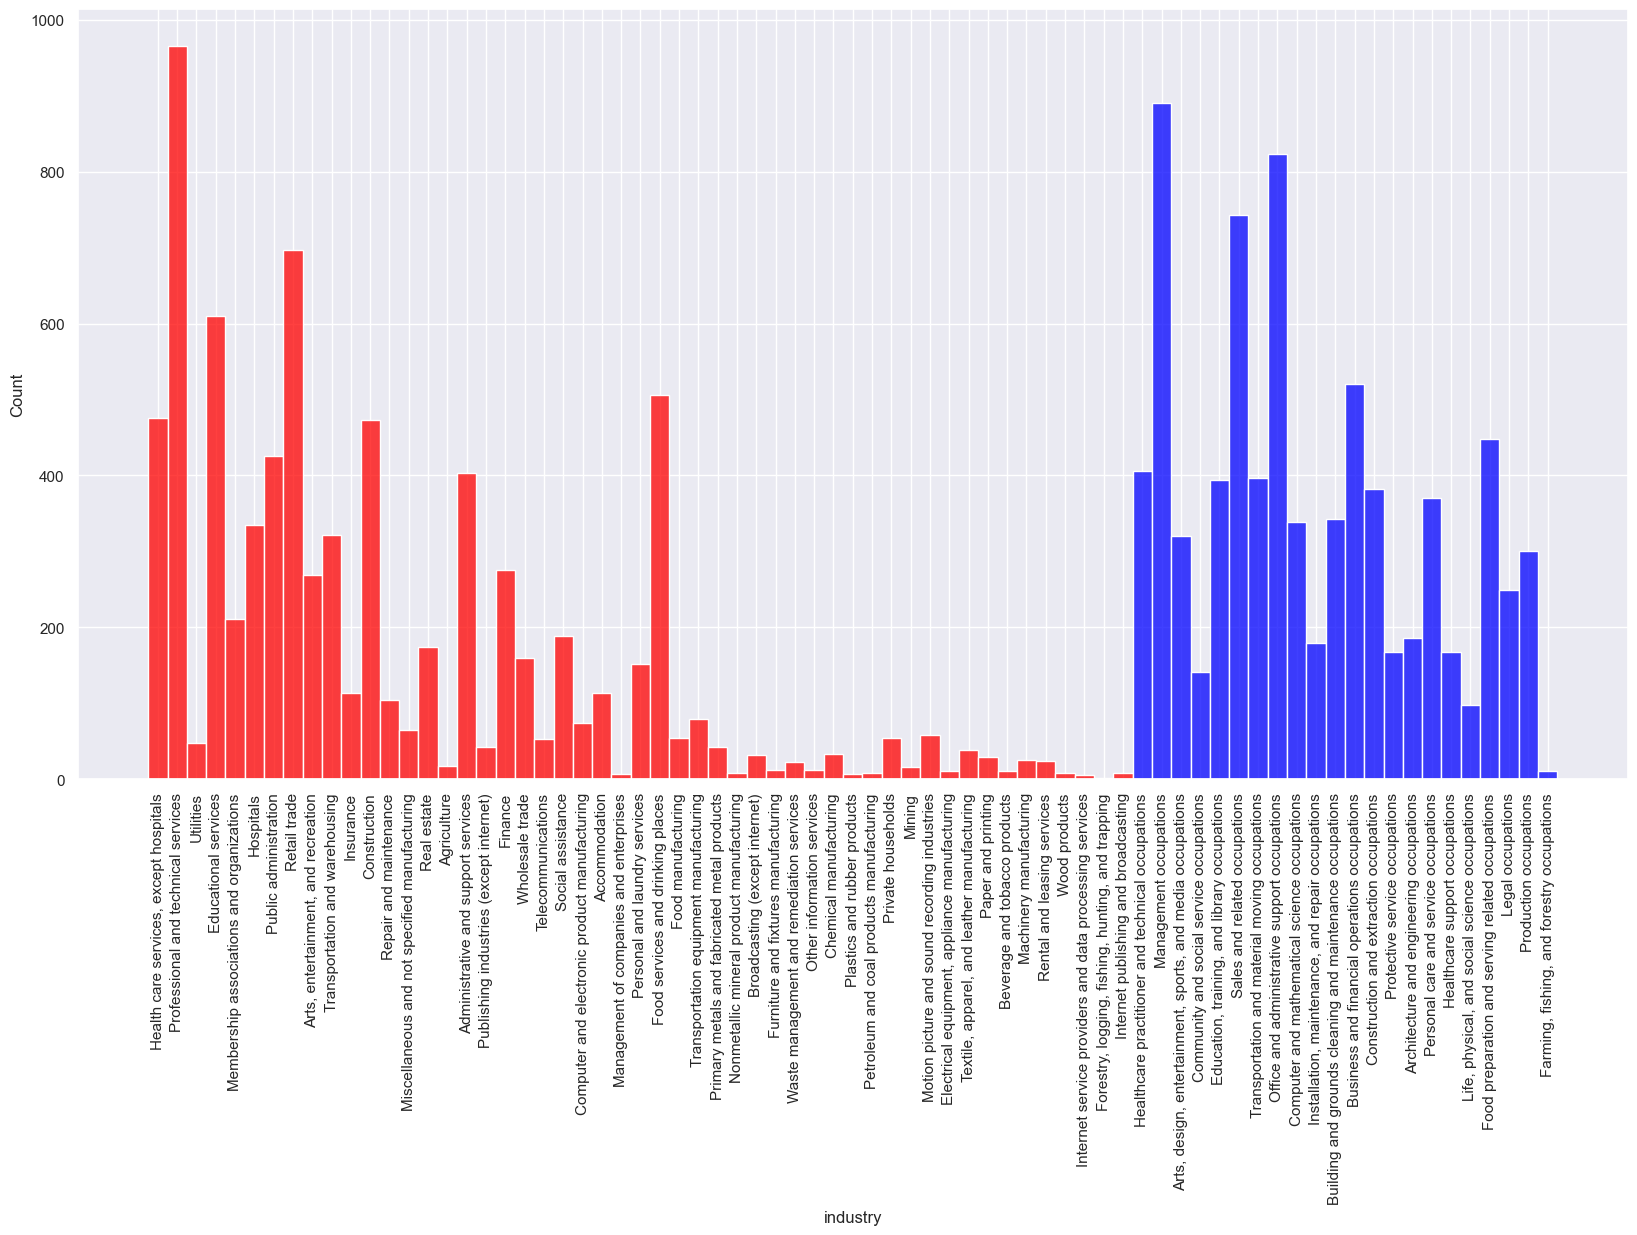

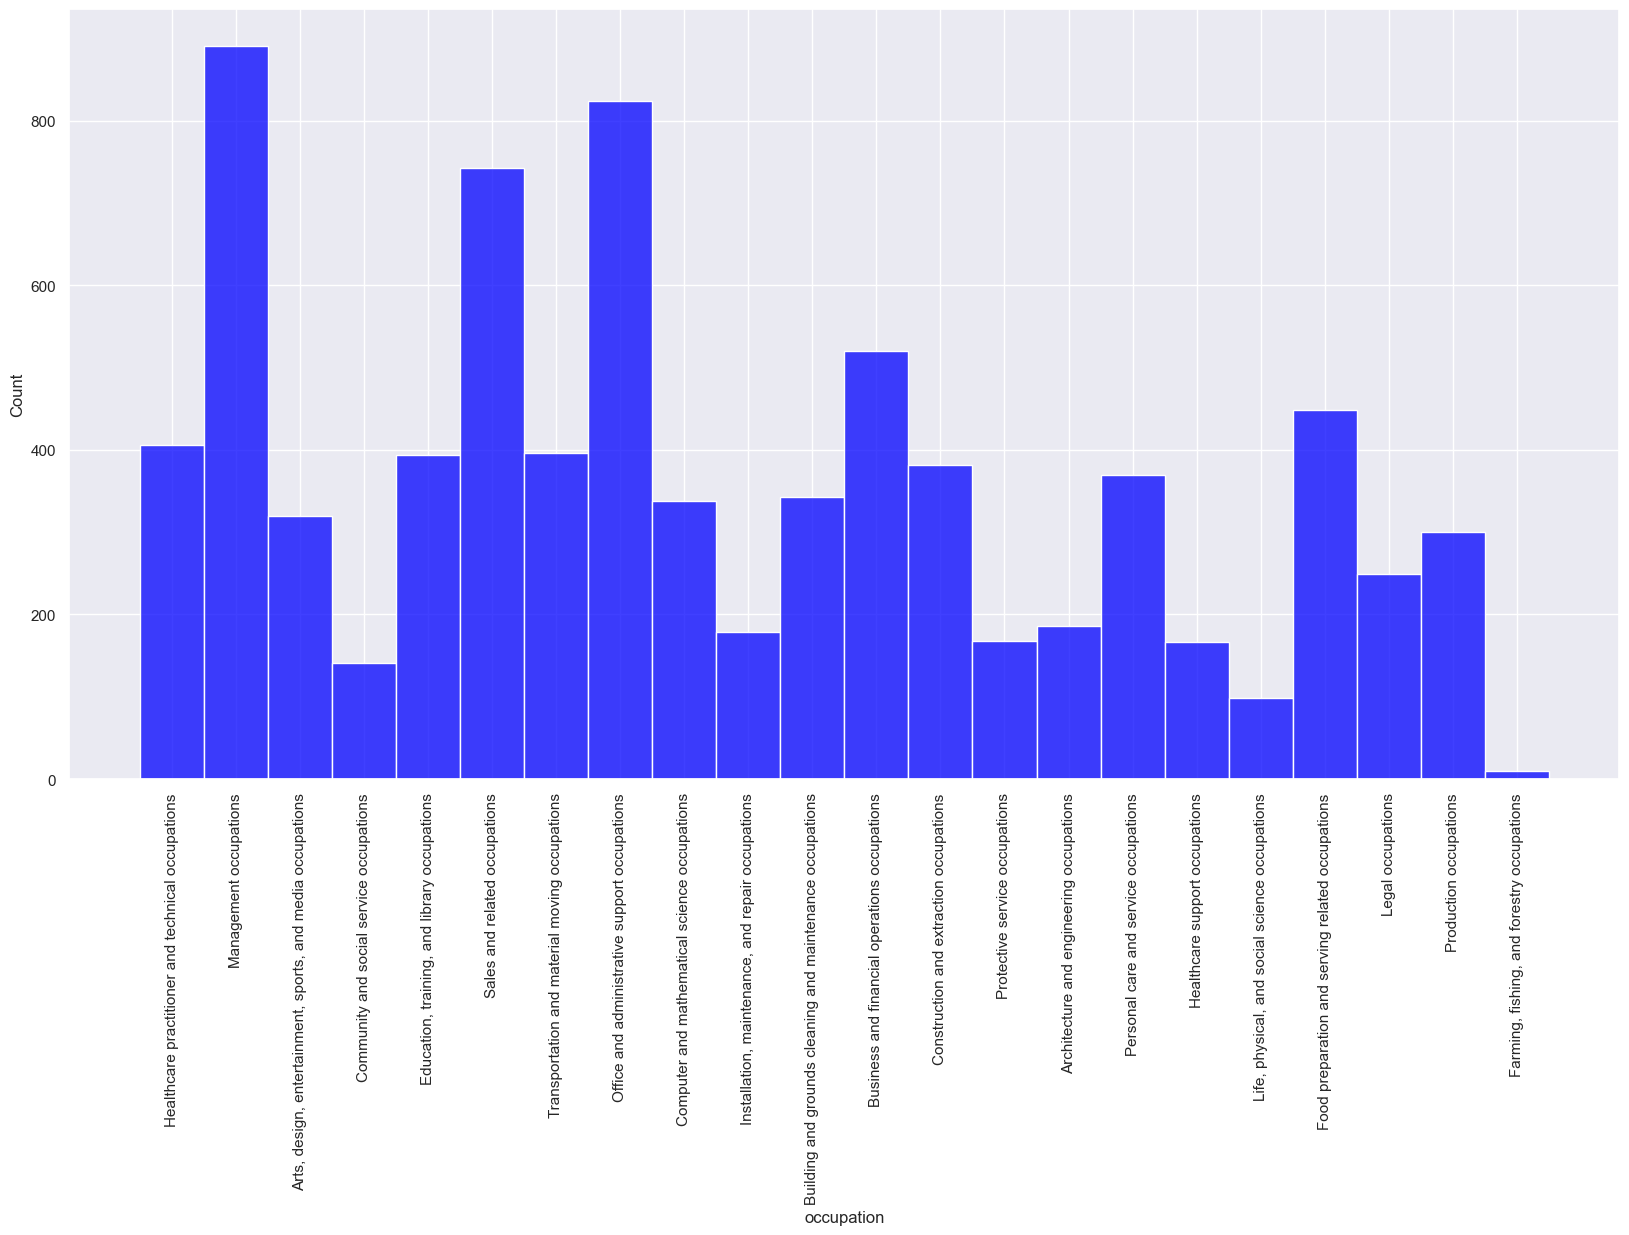

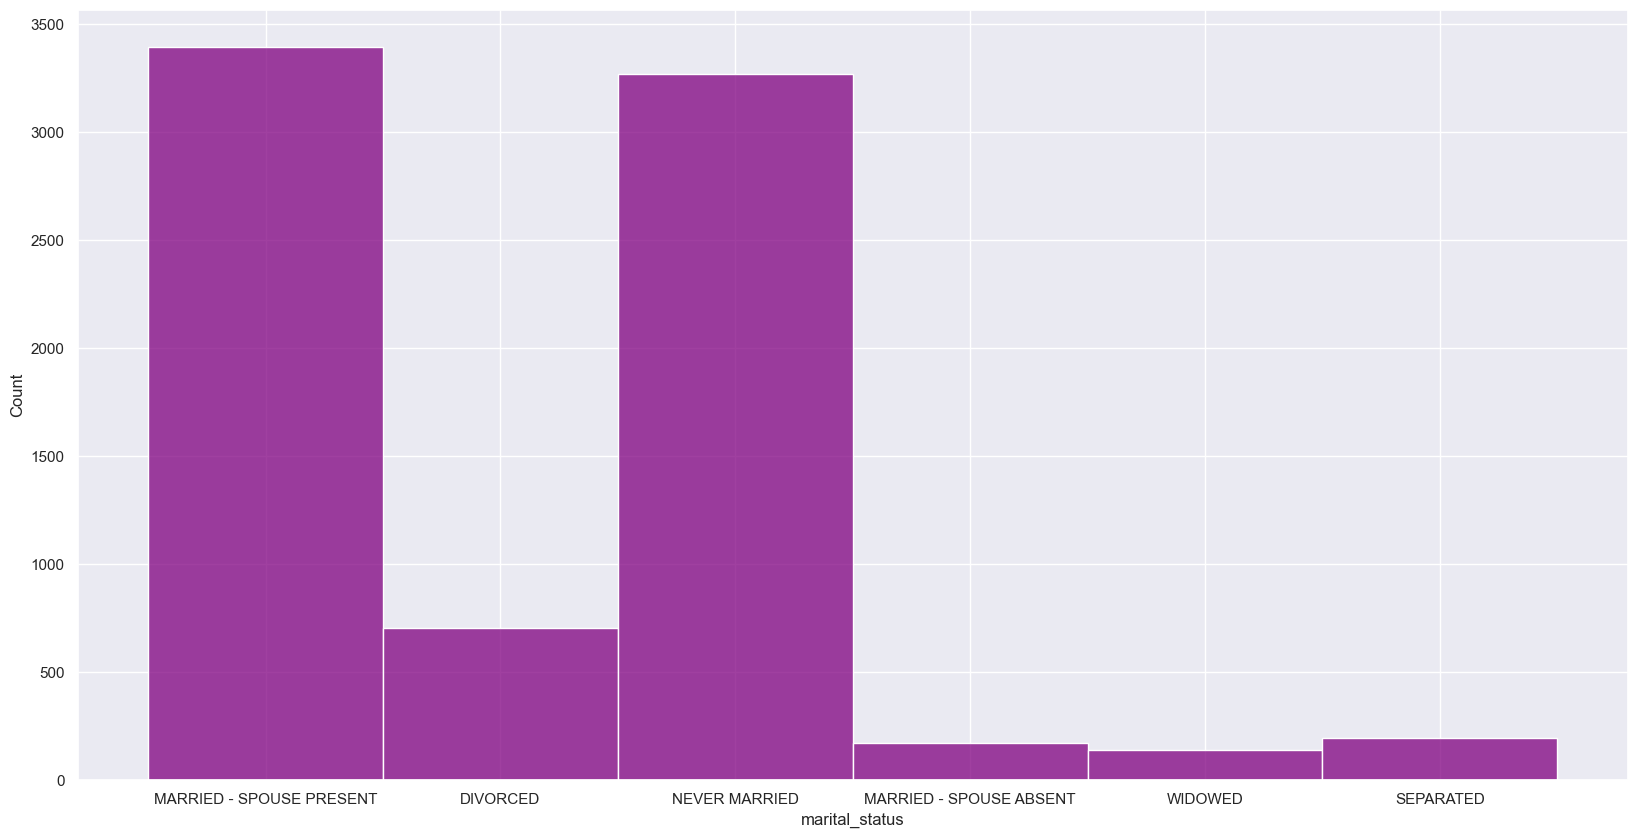

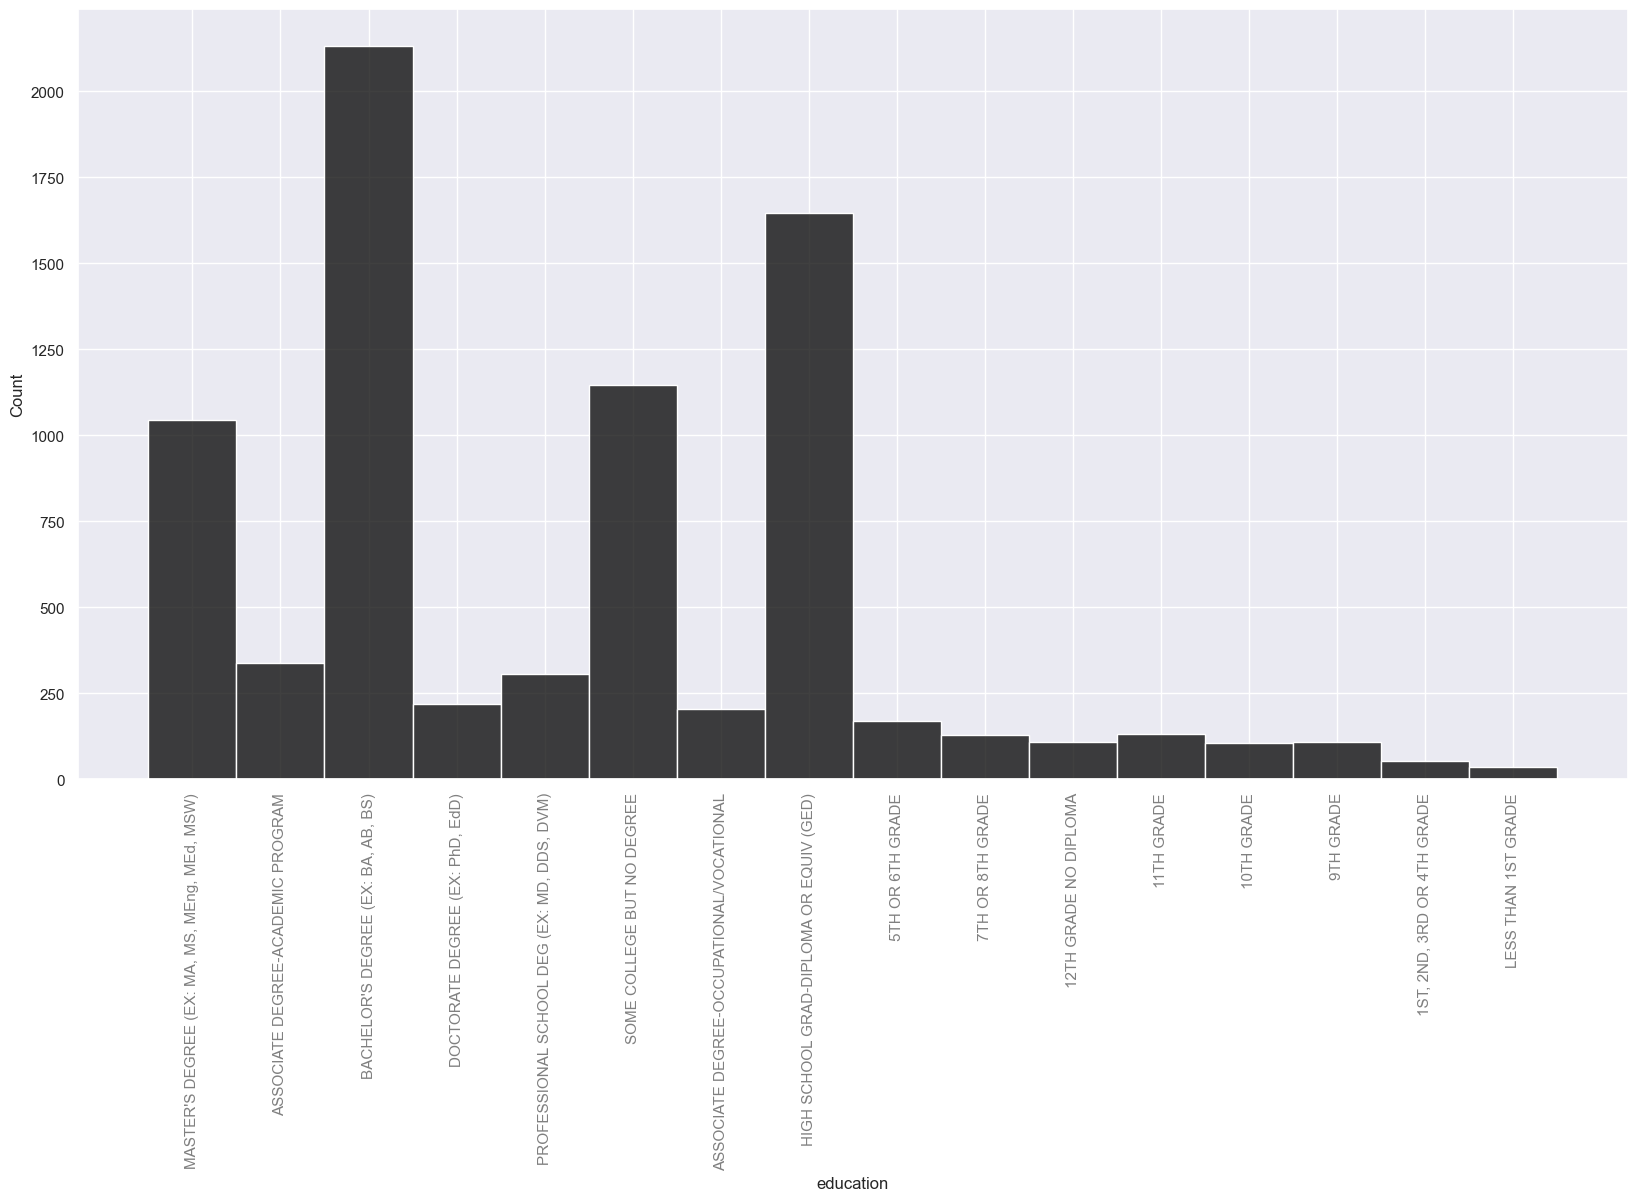

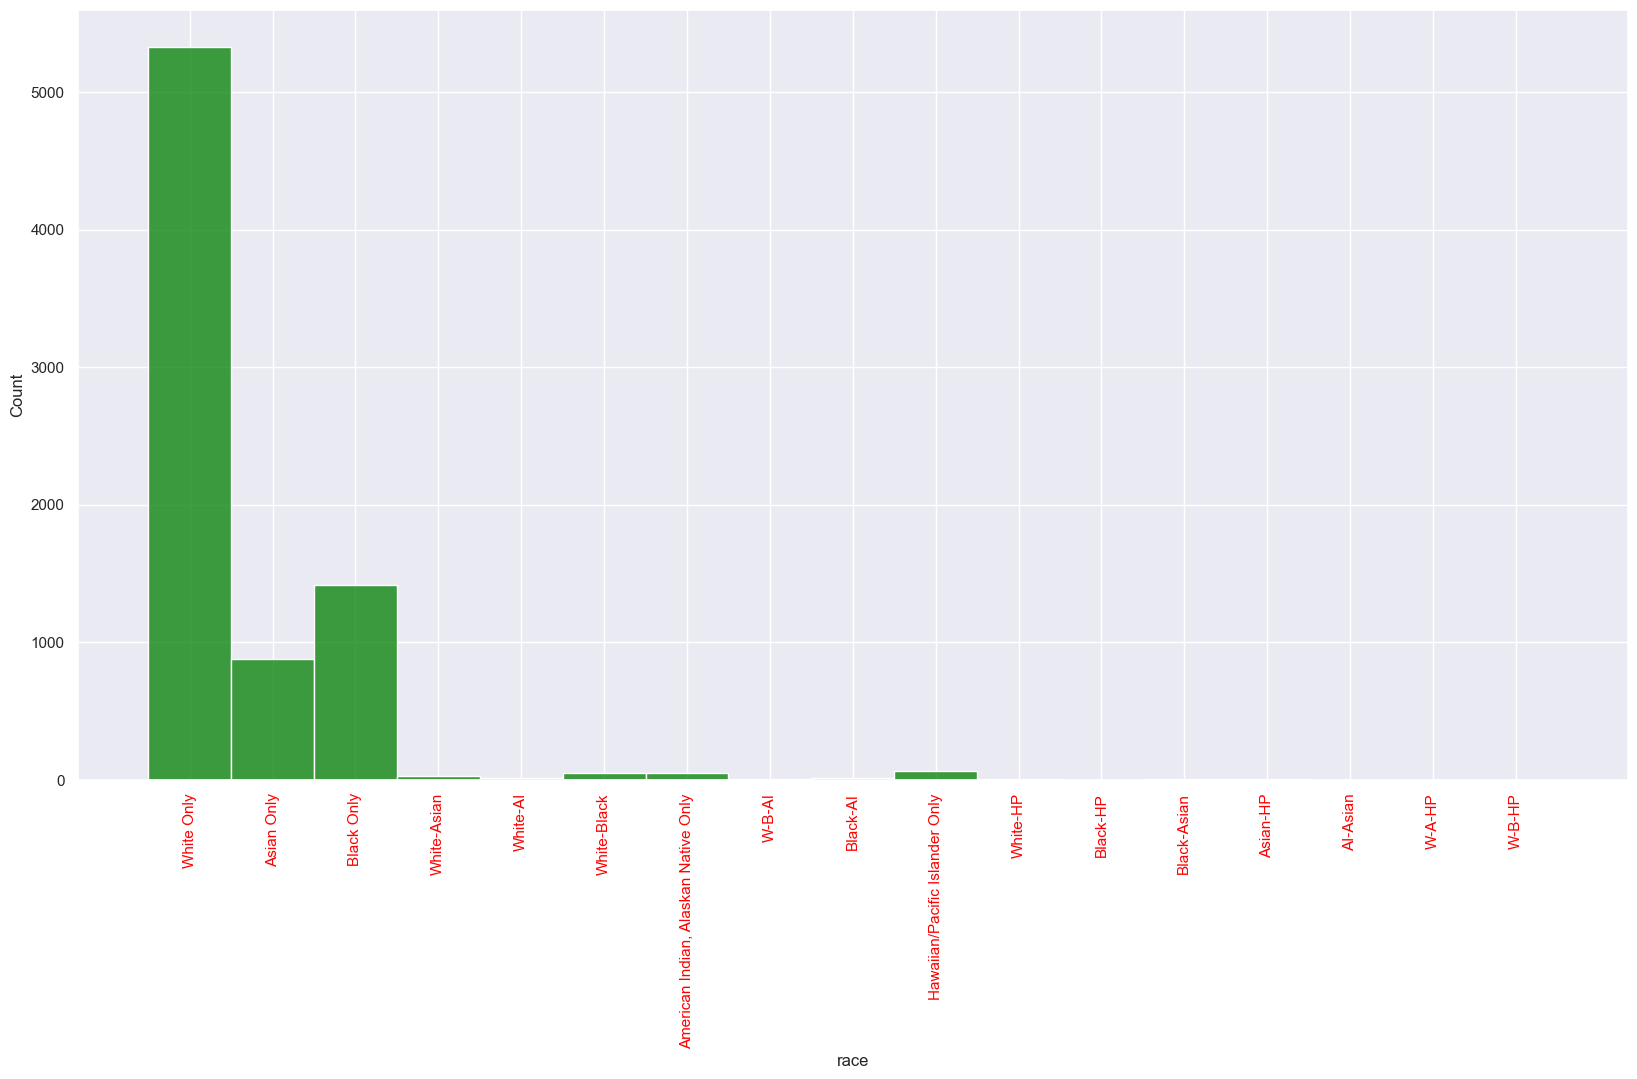

In [35]:
fig_numerical, axes_numerical = plt.subplots(1,2, figsize=(20,10))
axes_numerical[0].hist(raw_df['hours_a_week'])
axes_numerical[0].set_title('Hours a week Hist')
axes_numerical[1].hist(raw_df['age'])
axes_numerical[1].set_title('Age  Hist')
plt.show()

sns.set_theme(style='darkgrid')
fig_industry, ax_industry = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
ax_industry.tick_params(axis='x', labelrotation=90)
sns.histplot(raw_df['industry'], color='red',ax=ax_industry)
sns.histplot(raw_df['occupation'], color='blue',ax=ax_industry)

fig_occupation, ax_occupation = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
ax_occupation.tick_params(axis='x', labelrotation=90)
sns.histplot(raw_df['occupation'], color='blue',ax=ax_occupation)

fig_marital, ax_marital = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
sns.histplot(raw_df['marital_status'], color='purple',ax=ax_marital)

fig_education, ax_education = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
sns.histplot(raw_df['education'], color='black',ax=ax_education)
ax_education.tick_params(axis='x', labelrotation=90, labelcolor='gray')

fig_race, ax_race = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
sns.histplot(raw_df['race'], color='green',ax=ax_race, )
ax_race.tick_params(axis='x', labelrotation=90, labelcolor='red')

px.histogram(raw_df,'metropolitan')

## Preprocessing

### Replace value for cols

In [36]:
'''
We can use 
+map function: data['sex'].replace({0:'Female',1:'Male'},inplace=True)
+apply function: data['sex'] = data['sex'].apply({1:'Male', 0:'Female'}.get)
+replace function: data['sex']=data['sex'].map({0:'Female',1:'Male'}) -> non-destructive and can run multiple time
'''
#for binary cols
raw_df['sex'].replace({1: 'male', 2: 'female'}, inplace=True)
raw_df['ft/pt'].replace({1: 'full-time', 2: 'part-time'}, inplace=True)
raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision',
       'diff_climbing_walking','diff_dressing_bathing','disability_issue']] = raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision','diff_climbing_walking','diff_dressing_bathing','disability_issue']].replace({1: 1, 2: 0})
raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision',
       'diff_climbing_walking','diff_dressing_bathing','disability_issue']] = raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision','diff_climbing_walking','diff_dressing_bathing','disability_issue']].astype(bool)
print(raw_df.head())

   person_id  age     sex      ft/pt  hours_a_week  deaf_diff_hearing  \
0       4964   51    male  full-time            50              False   
1       5069   39  female  full-time            40              False   
2       5068   40    male  full-time            40              False   
3       5199   56  female  full-time            40              False   
4       5712   46    male  full-time            60              False   

   blind_diff_seeing_glass  diff_concerntrating_remembering_decision  \
0                    False                                     False   
1                    False                                     False   
2                    False                                     False   
3                    False                                     False   
4                    False                                     False   

   diff_climbing_walking  diff_dressing_bathing  disability_issue  \
0                  False                  False            

### Split True/False cols for later use when inputting in the mlextend

In [37]:
keep_df = raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision',
       'diff_climbing_walking','diff_dressing_bathing','disability_issue']]
raw_df.drop(['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision','diff_climbing_walking','diff_dressing_bathing','disability_issue'], inplace=True, axis=1)
print(keep_df.head())
print(raw_df.head())

   deaf_diff_hearing  blind_diff_seeing_glass  \
0              False                    False   
1              False                    False   
2              False                    False   
3              False                    False   
4              False                    False   

   diff_concerntrating_remembering_decision  diff_climbing_walking  \
0                                     False                  False   
1                                     False                  False   
2                                     False                  False   
3                                     False                  False   
4                                     False                  False   

   diff_dressing_bathing  disability_issue  
0                  False             False  
1                  False             False  
2                  False             False  
3                  False             False  
4                  False             False  
   person_id  

### Binning numerical 

In [38]:
# bins_hours_week = [-5,0,10,24,40,50,60,99]
# labels_hours_week = ["Vary", "Little", "Semi PT", "Semi FT","Slighly Much","Much", "Extreme"]
# raw_df['hours_a_week'] = pd.cut(raw_df['hours_a_week'], bins=bins_hours_week, labels=labels_hours_week)

bins_hours_week = [-5,0,10,20,30,40,50,60,99]
labels_hours_week = ["Vary hr", "Little hr", "10-20hr", "20-30hr","30-40hr","40-50hr", "Much hr","Extreme hr"]
raw_df['hours_a_week'] = pd.cut(raw_df['hours_a_week'], bins=bins_hours_week, labels=labels_hours_week)

bins_age = [0, 10, 20, 30, 40, 50,60, 70, 80, 99]
labels_age = ["Child", "Teen", "20-30", "30-40","40-50", "50-60", "60-70","70-80","80+"]
raw_df['age'] = pd.cut(raw_df['age'], bins=bins_age, labels=labels_age)


## Fine - tune model

### Cluster category into single

In [26]:
#Gom class race khac only thanh 1 class duy nhat là other
raw_df['race'].replace({
    "American Indian, Alaskan Native Only":'Other',
    "Hawaiian/Pacific Islander Only":'Other',
    "White-Black":'Other',
    "White-AI":'Other',
    "White-Asian":'Other',
    "White-HP":'Other',
    "Black-AI":'Other',
    "Black-Asian":'Other',
    "Black-HP":'Other',
    "AI-Asian":'Other',
    "AI-HP":'Other',
    "Asian-HP":'Other',
    "W-B-AI":'Other',
    "W-B-A":'Other',
    "W-B-HP":'Other',
    "W-AI-A":'Other',
    "W-AI-HP":'Other',
    "W-A-HP":'Other',
    "B-AI-A":'Other',
    "W-B-AI-A":'Other',
    "W-A-HP":'Other',
    "W-AI-A-HP":'Other',
    "Other 3 Race Combinations":'Other',
    "Other 4 and 5 Race Combinations":'Other',
}, inplace=True)

#Gom class thanh wife issue
raw_df['marital_status'].replace({
    "MARRIED - SPOUSE ABSENT":'WIFE ISSUE',
    "WIDOWED":'WIFE ISSUE',
    "DIVORCED":'WIFE ISSUE',
    "SEPARATED":'WIFE ISSUE',
    
}, inplace=True)

### Drop some cols for focusing on important things

In [27]:
#remove some cols for fine-tune step
raw_df.drop(['industry', 'metropolitan'], axis=1, inplace=True)

In [28]:
print(raw_df.head())
raw_df.to_csv('./temp/employment1.csv', index=False)

   person_id    age     sex      ft/pt hours_a_week  \
0       4964  50-60    male  full-time      40-50hr   
1       5069  30-40  female  full-time      30-40hr   
2       5068  30-40    male  full-time      30-40hr   
3       5199  50-60  female  full-time      30-40hr   
4       5712  40-50    male  full-time      Much hr   

                                          occupation  \
0  Healthcare practitioner and technical occupations   
1  Healthcare practitioner and technical occupations   
2                             Management occupations   
3                             Management occupations   
4                             Management occupations   

             marital_status                                     education  \
0  MARRIED - SPOUSE PRESENT  MASTER'S DEGREE (EX: MA, MS, MEng, MEd, MSW)   
1  MARRIED - SPOUSE PRESENT  MASTER'S DEGREE (EX: MA, MS, MEng, MEd, MSW)   
2  MARRIED - SPOUSE PRESENT  MASTER'S DEGREE (EX: MA, MS, MEng, MEd, MSW)   
3  MARRIED - SPOUSE PRES

## Association Rule Setting Up

### For next stage

In [29]:
print(raw_df.head())
raw_df.to_csv('./temp/employment1.csv', index=False)

   person_id    age     sex      ft/pt hours_a_week  \
0       4964  50-60    male  full-time      40-50hr   
1       5069  30-40  female  full-time      30-40hr   
2       5068  30-40    male  full-time      30-40hr   
3       5199  50-60  female  full-time      30-40hr   
4       5712  40-50    male  full-time      Much hr   

                                          occupation  \
0  Healthcare practitioner and technical occupations   
1  Healthcare practitioner and technical occupations   
2                             Management occupations   
3                             Management occupations   
4                             Management occupations   

             marital_status                                     education  \
0  MARRIED - SPOUSE PRESENT  MASTER'S DEGREE (EX: MA, MS, MEng, MEd, MSW)   
1  MARRIED - SPOUSE PRESENT  MASTER'S DEGREE (EX: MA, MS, MEng, MEd, MSW)   
2  MARRIED - SPOUSE PRESENT  MASTER'S DEGREE (EX: MA, MS, MEng, MEd, MSW)   
3  MARRIED - SPOUSE PRES

### Explore Ds For fine tune insight

In [51]:
print('\n____________ Dataset info ____________')
print(raw_df.info())
print('\n____________ Some Data Examples ____________')
#print(raw_df.head(2))
print('\n____________ Features Values and count ____________')

#region Print all values and count of each feature
for col in raw_df.columns:
    print(raw_df[col].value_counts(),'\n')
#endregion


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7873 entries, 0 to 7872
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   person_id       7873 non-null   int64   
 1   age             7873 non-null   category
 2   sex             7873 non-null   object  
 3   ft/pt           7873 non-null   object  
 4   hours_a_week    7873 non-null   category
 5   industry        7873 non-null   object  
 6   occupation      7873 non-null   object  
 7   marital_status  7873 non-null   object  
 8   education       7873 non-null   object  
 9   race            7873 non-null   object  
 10  metropolitan    7873 non-null   object  
dtypes: category(2), int64(1), object(8)
memory usage: 631.2+ KB
None

____________ Some Data Examples ____________

____________ Features Values and count ____________
4964     1
12681    1
14300    1
10445    1
14309    1
        ..
45536    1
45925    

### Plotting Insight for fine tune

In [ ]:
sns.histplot(raw_df['hours_a_week'], color='red')
plt.show()
sns.histplot(raw_df['age'], color='blue')
plt.show()
# px.histogram(raw_df,'hours_a_week')

fig_numerical, axes_numerical = plt.subplots(1,2, figsize=(20,10))
axes_numerical[0].hist(raw_df['hours_a_week'])
axes_numerical[0].set_title('Hours a week Hist')
axes_numerical[1].hist(raw_df['age'])
axes_numerical[1].set_title('Age  Hist')
plt.show()

sns.set_theme(style='darkgrid')
fig_industry, ax_industry = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
ax_industry.tick_params(axis='x', labelrotation=90)
sns.histplot(raw_df['occupation'], color='blue',ax=ax_industry)

fig_occupation, ax_occupation = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
ax_occupation.tick_params(axis='x', labelrotation=90)
sns.histplot(raw_df['occupation'], color='blue',ax=ax_occupation)

fig_marital, ax_marital = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
sns.histplot(raw_df['marital_status'], color='purple',ax=ax_marital)

fig_education, ax_education = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
sns.histplot(raw_df['education'], color='black',ax=ax_education)
ax_education.tick_params(axis='x', labelrotation=90, labelcolor='gray')

fig_race, ax_race = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
sns.histplot(raw_df['race'], color='green',ax=ax_race, )
ax_race.tick_params(axis='x', labelrotation=90, labelcolor='red')

## Association Rule


In [46]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

new_src_df = pd.read_csv('./temp/employment1.csv')
new_src_df.drop(['person_id'], inplace=True, axis=1)
dataset = []
for i in range(0, new_src_df.shape[0]):
    dataset.append([str(new_src_df.values[i,j]) for j in range(0, new_src_df.shape[1])])

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df = pd.concat([df, keep_df],axis=1)
df.head(2)
print(df.columns)
# print(type(oht_ary))
# print(oht_ary.shape)

Index(['10-20hr', '10TH GRADE', '11TH GRADE', '12TH GRADE NO DIPLOMA',
       '1ST, 2ND, 3RD OR 4TH GRADE', '20-30', '20-30hr', '30-40', '30-40hr',
       '40-50', '40-50hr', '50-60', '5TH OR 6TH GRADE', '60-70', '70-80',
       '7TH OR 8TH GRADE', '80+', '9TH GRADE',
       'ASSOCIATE DEGREE-ACADEMIC PROGRAM',
       'ASSOCIATE DEGREE-OCCUPATIONAL/VOCATIONAL',
       'Architecture and engineering occupations',
       'Arts, design, entertainment, sports, and media occupations',
       'Asian Only', 'BACHELOR'S DEGREE (EX: BA, AB, BS)', 'Black Only',
       'Building and grounds cleaning and maintenance occupations',
       'Business and financial operations occupations',
       'Community and social service occupations',
       'Computer and mathematical science occupations',
       'Construction and extraction occupations',
       'DOCTORATE DEGREE (EX: PhD, EdD)',
       'Education, training, and library occupations', 'Extreme hr',
       'Farming, fishing, and forestry occupations'

In [47]:
output = fpgrowth(df, min_support=0.002, use_colnames=oht.columns_)
output.head(20)

support                                           itemsets
0   0.849994                                        (full-time)
1   0.677251                                       (White Only)
2   0.528515                                             (male)
3   0.431348                         (MARRIED - SPOUSE PRESENT)
4   0.163343                                            (50-60)
5   0.132478     (MASTER'S DEGREE (EX: MA, MS, MEng, MEd, MSW))
6   0.121428                                          (40-50hr)
7   0.051569  (Healthcare practitioner and technical occupat...
8   0.644989                                          (30-40hr)
9   0.471485                                           (female)
10  0.256446                                            (30-40)
11  0.113172                           (Management occupations)
12  0.199670                                            (40-50)
13  0.041153                                          (Much hr)
14  0.150006                                        (part-time)
15  0.056903                                          (Vary hr)
16  0.040645  (Arts, design, entertainment, sports, and medi...
17  0.017909         (Community and social service occupations)
18  0.075829                                            (60-70)
19  0.050044     (Education, training, and library occupations)

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction' 'zhangs_metric']
-------------------------------------
Configuration :  confidence  :  0.8
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
                                          antecedents  \
0                                         (full-time)   
1                                         (full-time)   
2                                         (full-time)   
3                                         (full-time)   
4                                         (full-time)   
...                                               ...   
81303  (diff_climbing_walking, diff_dressing_bathing)   
81304       (disability_issue, diff_dressing_bathing)   
81305                         (diff_climbing_walking)   
81306                              (disability_issue)   
81307                         (diff_dressing_bathing)   

                      

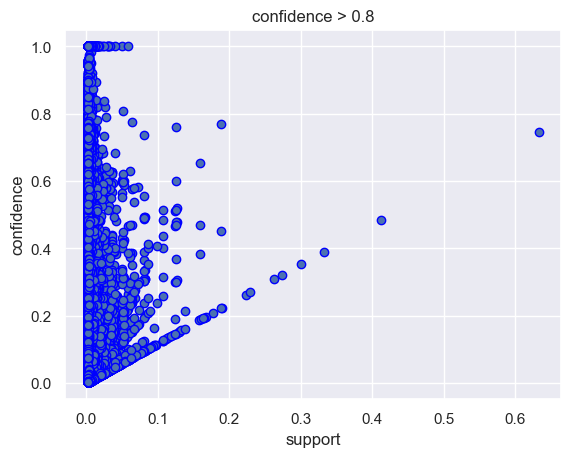

In [48]:
rules = association_rules(output, metric='zhangs_metric', min_threshold=0.6)
print (rules.columns.values)
print ('-------------------------------------')
print ('Configuration : ', 'confidence', ' : ', 0.8)
print ('-------------------------------------')

# override rules
# rules = rules[(rules['confidence'] > 0.8) & (rules['lift'] > 1.0) & (rules['confidence']!=1) & (rules['zhangs_metric'] > 0.7)]
print(type(rules))
print (rules)
rules.to_csv('./temp/rules.csv', index=False)

support=rules['support']
confidence=rules['confidence']

plt.scatter(support, confidence, edgecolors='blue')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('confidence > 0.8')
plt.show()

## Conclusion: Data Imbalance  due to distribution
> We cannot oversampling or downsampling since it will affect other class  
How to handle